In [1]:
# Visualization with seaborn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
df = pd.read_csv("data/Pokemon.csv", index_col=0,encoding="utf-8")
df.head()

,Name,Type1,Type2,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


## Explore attack vs defense

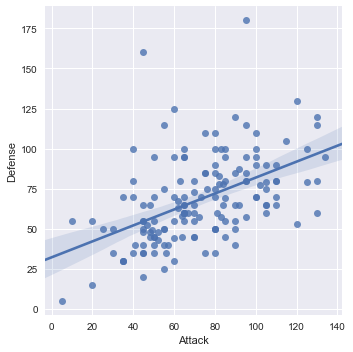

In [11]:
# find linear relationship
sns.lmplot(x='Attack', y='Defense', data=df)

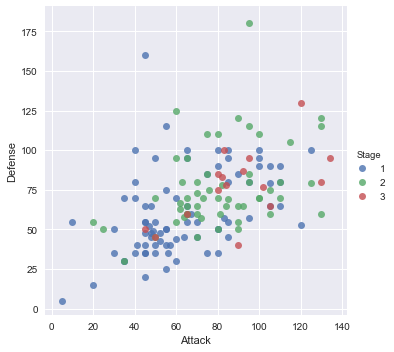

In [12]:
# Scatterplot arguments
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Stage')   # Color by evolution stage

In [13]:
# as both attack and defense axes fall below zero so plot needs to be improved further using matplotlib 
# custimization functions

(0, 142.22995008874818)

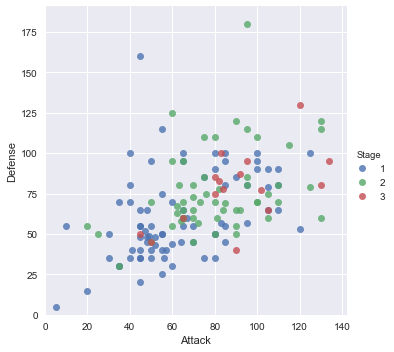

In [14]:
# Plot using Seaborn
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, 
           hue='Stage')
 
# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

In [15]:
# using pandas

/Users/sulbha/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


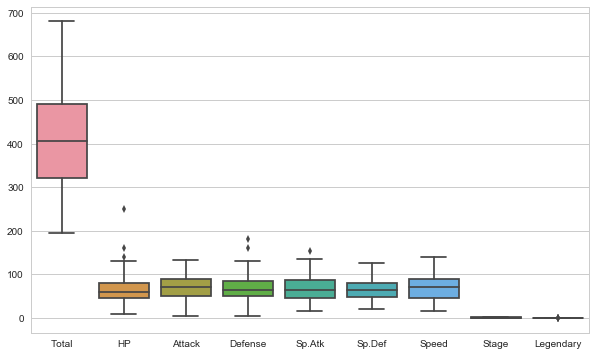

In [48]:
# Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=df)

/Users/sulbha/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


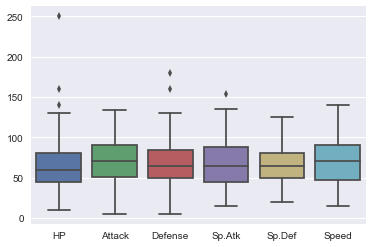

In [17]:
# remove total as we have individual plots. Also remve stage and legendary as there are not much stats.
# Pre-format DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
 
# New boxplot using stats_df
sns.boxplot(data=stats_df)

In [18]:
# themes in seaborn

/Users/sulbha/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/Users/sulbha/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


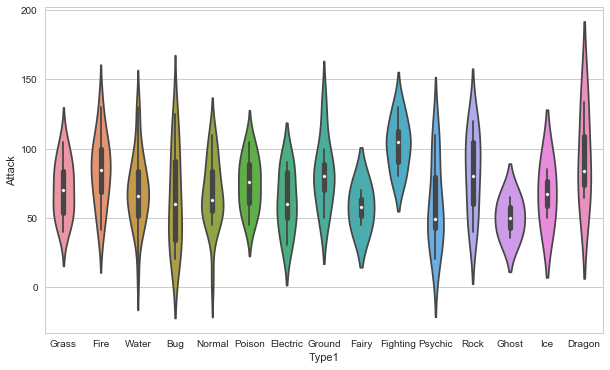

In [49]:
# Set theme
sns.set_style('whitegrid')
 
# Violin plot
plt.figure(figsize=(10,6))
sns.violinplot(x='Type1', y='Attack', data=df)

In [21]:
# Dragon types tend to have higher Attack stats than Ghost types, but they also have greater variance.

/Users/sulbha/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/Users/sulbha/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


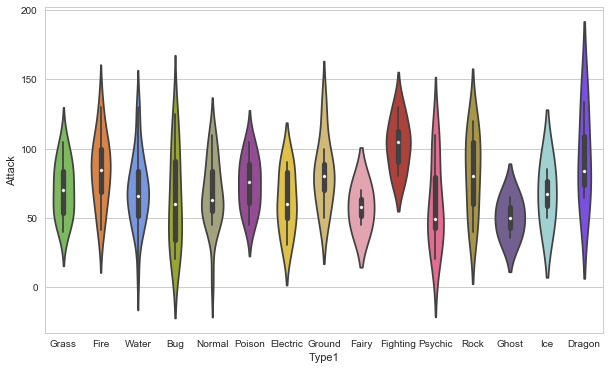

In [50]:
# set color palette
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]
# Violin plot with Pokemon color palette
plt.figure(figsize=(10,6))
sns.violinplot(x='Type1', y='Attack', data=df, 
               palette=pkmn_type_colors) # Set color palette

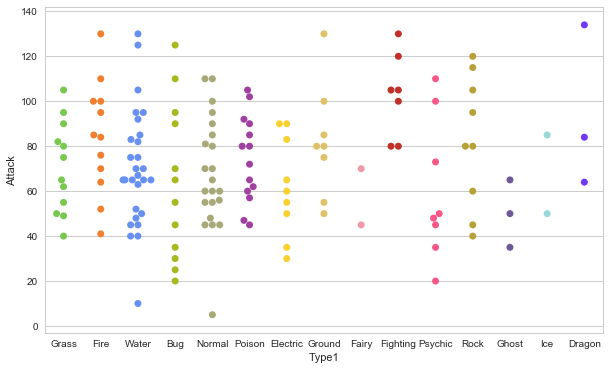

In [30]:
# usw swarm plots to display each point while stacking those with similar values
# Swarm plot with Pokemon color palette

plt.figure(figsize=(10,6))
sns.swarmplot(x='Type1', y='Attack', data=df, 
              palette=pkmn_type_colors, size =7)



/Users/sulbha/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)


Text(0.5,1,'Attack by Type')

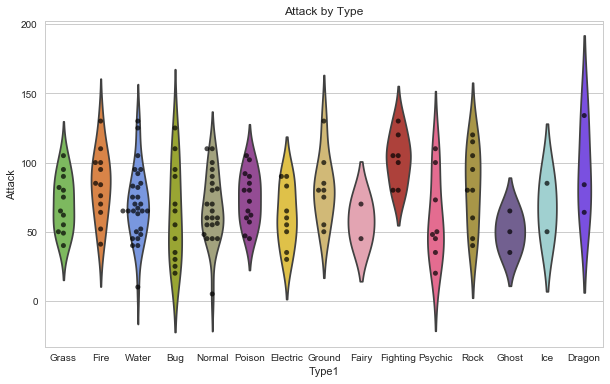

In [32]:
# overlaying swarm and violin plots
# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Create plot
sns.violinplot(x='Type1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type')

In [33]:
stats_df.head()

,Name,Type1,Type2,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


In [35]:
# melting to merge stats into one columns
# Melt DataFrame
melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type1", "Type2"], # Variables to keep
                    var_name="Stat") # Name of melted variable
melted_df.head()

,Name,Type1,Type2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


In [36]:
print( stats_df.shape )
print( melted_df.shape )

(151, 9)
(906, 5)


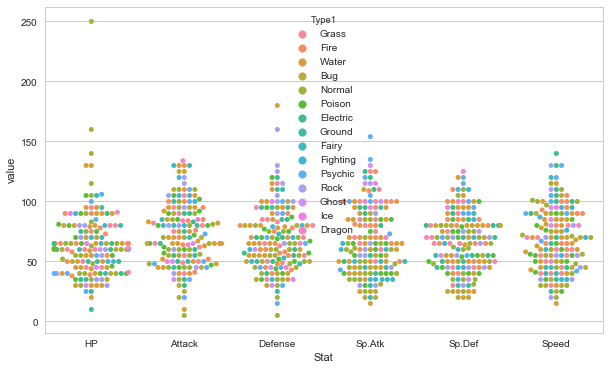

In [51]:
# Swarmplot with melted_df
plt.figure(figsize=(10,6))
sns.swarmplot(x='Stat', y='value', data=melted_df, 
              hue='Type1')

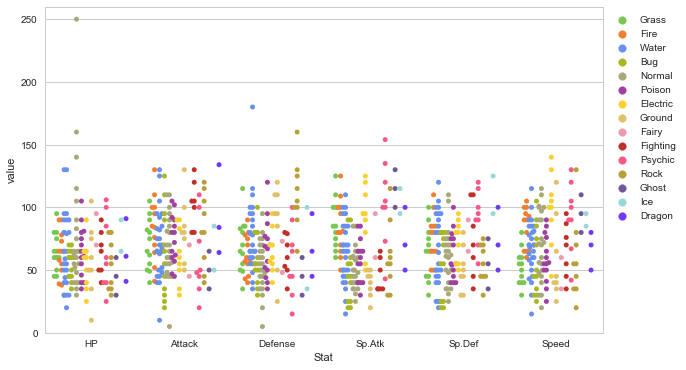

In [39]:
# final plot
# 1. Enlarge the plot
plt.figure(figsize=(10,6))
 
sns.swarmplot(x='Stat', 
              y='value', 
              data=melted_df, 
              hue='Type1', 
              split=True, # 2. Separate points by hue
              palette=pkmn_type_colors) # 3. Use Pokemon palette
 
# 4. Adjust the y-axis
plt.ylim(0, 260)
 
# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

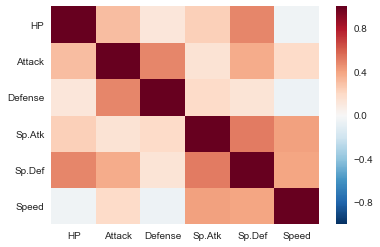

In [40]:
# Calculate correlations
corr = stats_df.corr()
 
# Heatmap
sns.heatmap(corr)

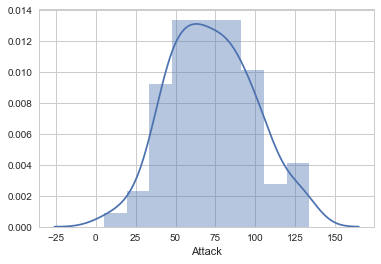

In [41]:
# Distribution Plot (a.k.a. Histogram)
# Histograms allow you to plot the distributions of numeric variables.
sns.distplot(df.Attack)

/Users/sulbha/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

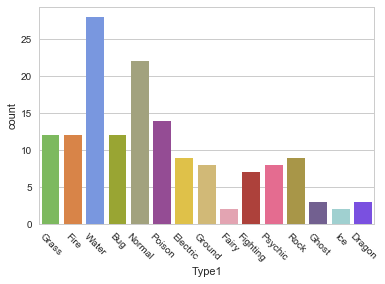

In [43]:
# Count Plot (a.k.a. Bar Plot)
# Bar plots help you visualize the distributions of categorical variables.
sns.countplot(x='Type1', data=df, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45)


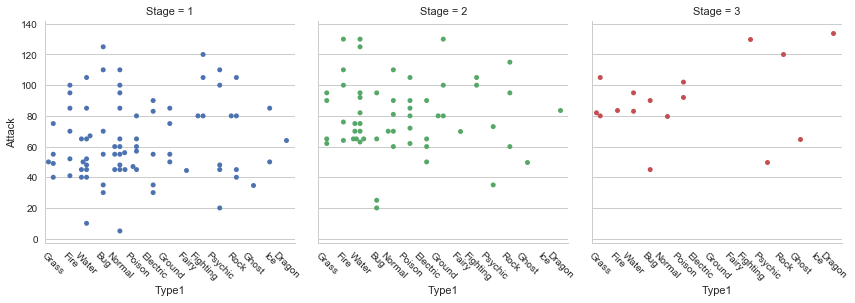

In [45]:
# Factor Plot
#Factor plots make it easy to separate plots by categorical classes.

g = sns.factorplot(x='Type1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)
 
# Doesn't work because only rotates last plot
# plt.xticks(rotation=-45)

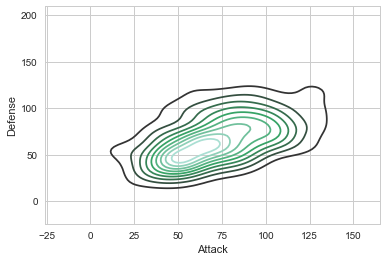

In [46]:
# Density Plot
# Density plots display the distribution between two variables.


sns.kdeplot(df.Attack, df.Defense)


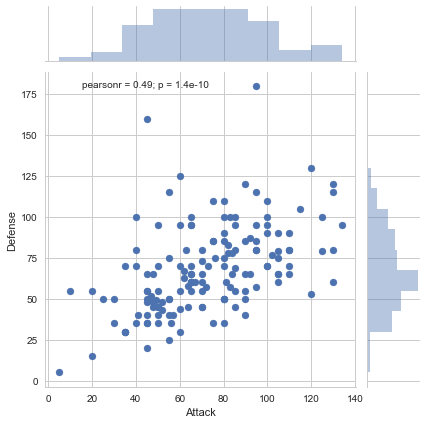

In [47]:
# Joint Distribution Plot
# Joint distribution plots combine information from scatter plots and histograms
# to give you detailed information for bi-variate distributions.
sns.jointplot(x='Attack', y='Defense', data=df)